# Proyek Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: Masdarul Rizqi
- Email: m.rizqi1221@gmail.com 
- Id Dicoding: masdarulrizqi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import joblib
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv("data/data.csv", delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Preparation

In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
label_encoder = LabelEncoder()

df['Status'] = label_encoder.fit_transform(df['Status'])
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [7]:
dt = df[[
    'Course', 
    'Daytime_evening_attendance', 
    'Admission_grade', 
    'Educational_special_needs', 
    'Debtor', 
    'Tuition_fees_up_to_date', 
    'Gender', 
    'Scholarship_holder', 
    'Age_at_enrollment', 
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Status'
]]
dt.head()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status
0,171,1,127.3,0,0,1,1,0,20,0.000000,0.000000,0
1,9254,1,142.5,0,0,0,1,0,19,14.000000,13.666667,2
2,9070,1,124.8,0,0,0,1,0,19,0.000000,0.000000,0
3,9773,1,119.6,0,0,1,0,0,20,13.428571,12.400000,2
4,8014,0,141.5,0,0,1,0,0,45,12.333333,13.000000,2


In [8]:
dt['Status_New'] = dt['Status'].replace({2: 1})
dt.head()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status,Status_New
0,171,1,127.3,0,0,1,1,0,20,0.000000,0.000000,0,0
1,9254,1,142.5,0,0,0,1,0,19,14.000000,13.666667,2,1
2,9070,1,124.8,0,0,0,1,0,19,0.000000,0.000000,0,0
3,9773,1,119.6,0,0,1,0,0,20,13.428571,12.400000,2,1
4,8014,0,141.5,0,0,1,0,0,45,12.333333,13.000000,2,1


In [9]:
dt_dummies = pd.get_dummies(dt['Status'],prefix='Status')
dt_dummies = pd.concat([dt,dt_dummies],axis=1)
dt_dummies.head()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status,Status_New,Status_0,Status_1,Status_2
0,171,1,127.3,0,0,1,1,0,20,0.000000,0.000000,0,0,True,False,False
1,9254,1,142.5,0,0,0,1,0,19,14.000000,13.666667,2,1,False,False,True
2,9070,1,124.8,0,0,0,1,0,19,0.000000,0.000000,0,0,True,False,False
3,9773,1,119.6,0,0,1,0,0,20,13.428571,12.400000,2,1,False,False,True
4,8014,0,141.5,0,0,1,0,0,45,12.333333,13.000000,2,1,False,False,True


In [10]:
dt_dummies.corr()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status,Status_New,Status_0,Status_1,Status_2
Course,1.000000,-0.043151,-0.125058,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,0.389349,0.348728,0.034219,0.033676,-0.033676,0.002758,0.029333
Daytime_evening_attendance,-0.043151,1.000000,0.007970,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.063974,0.050493,0.075107,0.080499,-0.080499,0.022073,0.058235
Admission_grade,-0.125058,0.007970,1.000000,-0.018306,-0.014423,0.054132,0.008315,0.018881,-0.029915,0.073868,0.074402,0.120889,0.095806,-0.095806,-0.046634,0.125263
Educational_special_needs,-0.018795,0.031017,-0.018306,1.000000,0.001343,0.013630,-0.017461,0.021223,-0.036987,-0.012284,-0.012761,-0.007353,-0.002806,0.002806,0.010190,-0.010441
Debtor,-0.032673,0.006658,-0.014423,0.001343,1.000000,-0.408454,0.053812,-0.067489,0.098793,-0.104170,-0.139424,-0.240999,-0.229407,0.229407,-0.000513,-0.213845
Tuition_fees_up_to_date,0.018381,0.038799,0.054132,0.013630,-0.408454,1.000000,-0.104098,0.137421,-0.178099,0.250394,0.296480,0.409827,0.429149,-0.429149,0.095864,0.327197
Gender,-0.099571,-0.012326,0.008315,-0.017461,0.053812,-0.104098,1.000000,-0.169302,0.148835,-0.189448,-0.199133,-0.229270,-0.203983,0.203983,0.034214,-0.216754
Scholarship_holder,0.017138,0.093912,0.018881,0.021223,-0.067489,0.137421,-0.169302,1.000000,-0.189917,0.168324,0.181227,0.297595,0.245354,-0.245354,-0.091666,0.299484
Age_at_enrollment,0.042994,-0.462280,-0.029915,-0.036987,0.098793,-0.178099,0.148835,-0.189917,1.000000,-0.156616,-0.173419,-0.243438,-0.254215,0.254215,-0.055241,-0.195009
Curricular_units_1st_sem_grade,0.389349,0.063974,0.073868,-0.012284,-0.104170,0.250394,-0.189448,0.168324,-0.156616,1.000000,0.837170,0.485207,0.480669,-0.480669,0.046781,0.412982


In [11]:
dt_dummies.describe()

,Course,Daytime_evening_attendance,Admission_grade,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,Status,Status_New
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,8856.642631,0.890823,126.978119,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,10.640822,10.230206,1.178119,0.678797
std,2063.566416,0.311897,14.482001,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,4.843663,5.210808,0.888243,0.466991
min,33.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,9085.000000,1.000000,117.900000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,11.000000,10.750000,0.000000,0.000000
50%,9238.000000,1.000000,126.100000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,12.285714,12.200000,1.000000,1.000000
75%,9556.000000,1.000000,134.800000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,13.400000,13.333333,2.000000,1.000000
max,9991.000000,1.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,18.875000,18.571429,2.000000,1.000000


In [12]:
filter_do = dt_dummies.loc[dt_dummies['Status']==0]
filter_enrolled = dt_dummies.loc[dt_dummies['Status']==1]
filter_graduated = dt_dummies.loc[dt_dummies['Status']==2]
filter_notdo = dt_dummies.loc[dt_dummies['Status']>0]

In [13]:
print(f"Jumlah siswa dropout: {len(filter_do)}")
print(f"Jumlah siswa terdaftar: {len(filter_enrolled)}")
print(f"Jumlah siswa lulus: {len(filter_graduated)}")
print(f"Dropout rate: {str(round((len(filter_do)/len(dt)*100),2))}%")
print(f"Graduation rate: {str(round((len(filter_graduated)/len(dt)*100),2))}%")

Jumlah siswa dropout: 1421
Jumlah siswa terdaftar: 794
Jumlah siswa lulus: 2209
Dropout rate: 32.12%
Graduation rate: 49.93%


In [14]:
print(f"Jumlah penerima beasiswa: {df['Scholarship_holder'].sum()}")

Jumlah penerima beasiswa: 1099


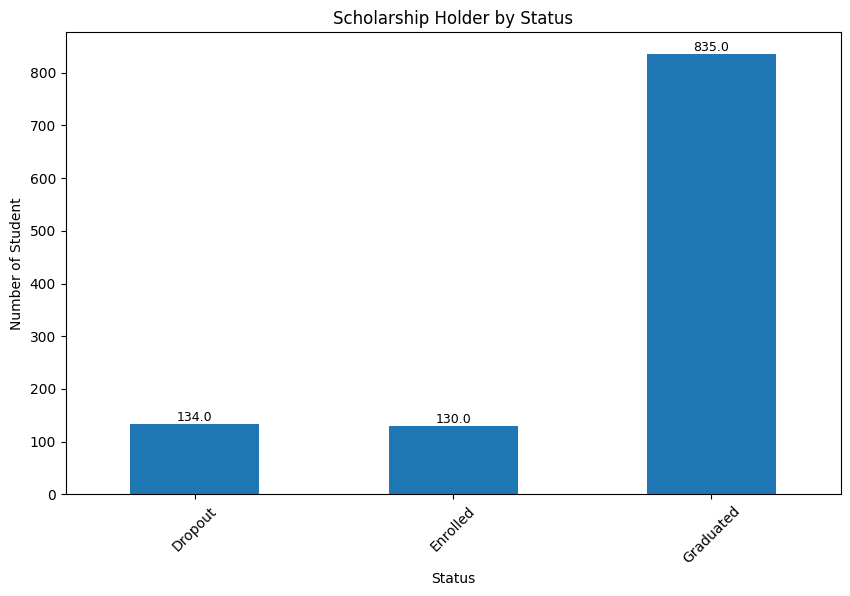

In [15]:
x = df.groupby('Status')['Scholarship_holder'].sum()

plt.figure(figsize=(10, 6))

x.plot(kind='bar')

plt.xlabel('Status')
plt.ylabel('Number of Student')
plt.title('Scholarship Holder by Status')
plt.xticks(rotation=45)

labels = ['Dropout', 'Enrolled', 'Graduated']
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

for index, value in enumerate(x):
    plt.text(index, value, f"{float(value):,}", ha='center', va='bottom', fontsize=9, )

plt.show()

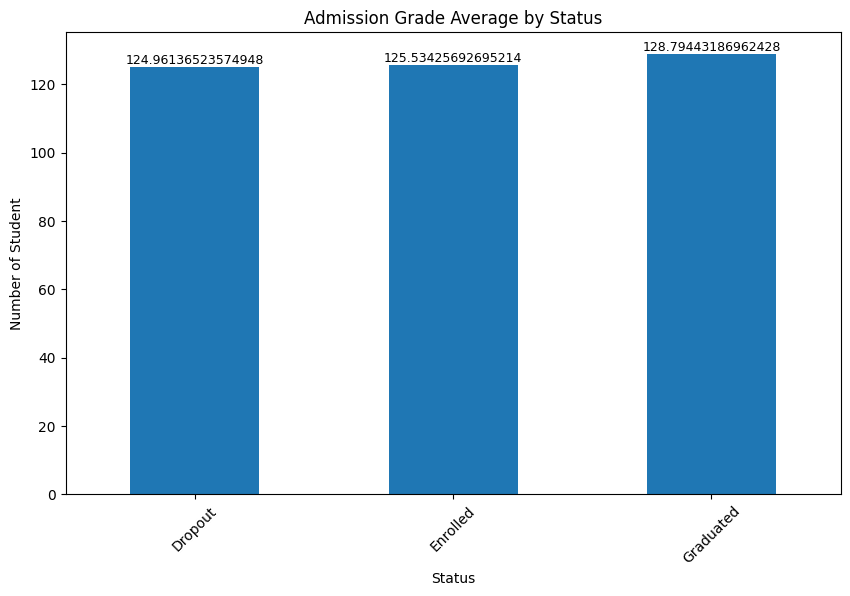

In [16]:
x = df.groupby('Status')['Admission_grade'].mean()

plt.figure(figsize=(10, 6))

x.plot(kind='bar')

plt.xlabel('Status')
plt.ylabel('Number of Student')
plt.title('Admission Grade Average by Status')
plt.xticks(rotation=45)

labels = ['Dropout', 'Enrolled', 'Graduated']
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

for index, value in enumerate(x):
    plt.text(index, value, f"{float(value):,}", ha='center', va='bottom', fontsize=9, )

plt.show()

In [17]:
data_do = dt_dummies[dt_dummies['Status_0'] == 1]
data_enrolled = dt_dummies[dt_dummies['Status_1'] == 1]
data_graduated = dt_dummies[dt_dummies['Status_2'] == 1]

Course_do = data_do.groupby('Course')['Status_0'].sum()
Course_enrolled = data_enrolled.groupby('Course')['Status_1'].sum()
Course_graduated = data_graduated.groupby('Course')['Status_2'].sum()

total_Course = round((Course_do/(Course_do+Course_enrolled+Course_graduated)*100),2)
total_Course

Course
33      66.67
171     38.14
8014    33.02
9003    40.95
9070    22.57
9085    26.71
9119    54.12
9130    55.32
9147    35.26
9238    18.31
9254    38.10
9500    15.40
9556    38.37
9670    35.45
9773    30.51
9853    44.27
9991    50.75
dtype: float64

In [18]:
dt_dummies.to_csv("data/data_baru.csv")

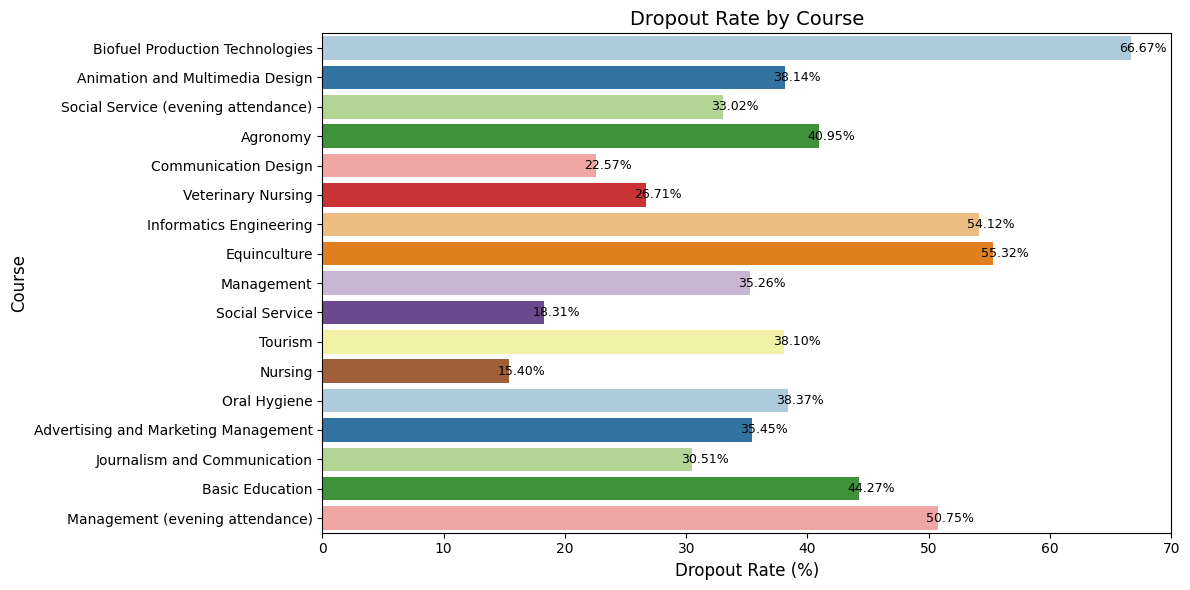

In [19]:
x = total_Course

labels = [
    'Biofuel Production Technologies',
    'Animation and Multimedia Design',
    'Social Service (evening attendance)',
    'Agronomy',
    'Communication Design',
    'Veterinary Nursing',
    'Informatics Engineering',
    'Equinculture',
    'Management',
    'Social Service',
    'Tourism',
    'Nursing',
    'Oral Hygiene',
    'Advertising and Marketing Management',
    'Journalism and Communication',
    'Basic Education',
    'Management (evening attendance)'
]

plt.figure(figsize=(12, 6))
sns.barplot(x=total_Course, y=labels, palette='Paired')

# Adding titles and labels
plt.title('Dropout Rate by Course', fontsize=14)
plt.xlabel('Dropout Rate (%)', fontsize=12)
plt.ylabel('Course', fontsize=12)

# Adding value labels on top of the bars
for i, rate in enumerate(total_Course):
    plt.text(rate + 1, i, f'{rate:.2f}%', ha='center', va='center', fontsize=9)

# Display the plot
plt.tight_layout()
plt.show()

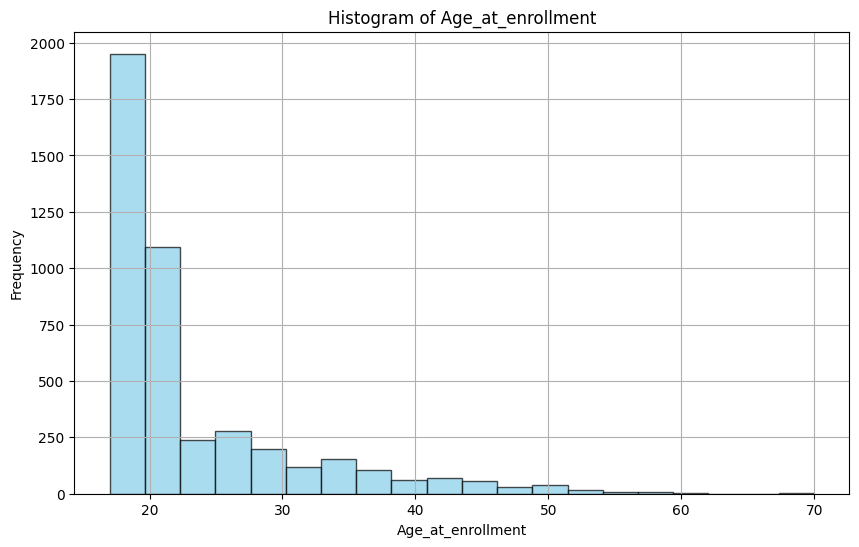

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(dt_dummies['Age_at_enrollment'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)  
plt.xlabel('Age_at_enrollment')
plt.ylabel('Frequency')
plt.title('Histogram of Age_at_enrollment')
plt.grid(True)  # Add grid lines for better readability
plt.show()

## Modeling And Evaluasi

### 1. Random Forest Classifier

In [21]:
X = dt_dummies[['Course', 'Daytime_evening_attendance', 'Admission_grade', 'Educational_special_needs', 
        'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment',
        'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']]
y = dt_dummies['Status_New']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8350282485875706

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       316
           1       0.83      0.93      0.88       569

    accuracy                           0.84       885
   macro avg       0.84      0.80      0.81       885
weighted avg       0.84      0.84      0.83       885



In [25]:
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']